# BP 演算法訓練的神經網路


目標: 嘗試著用輸入去預測輸出, 了解權重的更新
 
考慮以上情形：
給定三row輸入，試著去預測對應的一row輸出。

我們可以通過簡單測量輸入與輸出值的資料來解決這一問題。

最左邊的一 row 輸入值和輸出值是完美匹配/完全相關的。

反向傳播演算法便是通過這種方式來衡量資料間統計關係進而得到模型的。


# 參數定義

X	輸入資料集，形式為矩陣，每 1 column 代表 1 個訓練樣本。

y	輸出資料集，形式為矩陣，每 1 column 代表 1 個訓練樣本。

l0	網路第 1 層，即網路輸入層。

l1	網路第 2 層，常稱作隱藏層。

syn0	第一層權值，突觸 0 ，連接 l0 層與 l1 層。

*	逐元素相乘，故兩等長向量相乘等同於其對等元素分別相乘，結果為同等長度的向量。

–	元素相減，故兩等長向量相減等同於其對等元素分別相減，結果為同等長度的向量。

x.dot(y)	若 x 和 y 為向量，則進行點積操作；若均為矩陣，則進行矩陣相乘操作；若其中之一為矩陣，則進行向量與矩陣相乘操作。


In [6]:
import numpy as np
 
# Sigmoid 函數可以將任何值都映射到一個位於 0 到  1 範圍內的值。通過它，我們可以將實數轉化為概率值
'''
定義數學函數:
y=f(x) = 1/(1+np.exp(-x));
dy/dx = df = y*(1-y) 

為了計算方便, 這邊把 y=f(x) 與 dy/dx 放在同一function 裡面;
利用 deriv (derivative)做變數, 來分別指定方程式

'''    

def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))
'''
通過 “nonlin” 函數體還能得到 sigmod 函數的導數（當形參 deriv 為 True 時）。
Sigmoid 函數優異特性之一，在於只用它的輸出值便可以得到其導數值。
若 Sigmoid 的輸出值用變數 out 表示，則其導數值可簡單通過式子 out *(1-out) 
'''

'''
input dataset
輸入資料集初始化為 numpy 中的矩陣。每一 column 為一個“訓練實例”，
每一 row 的對應著一個輸入節點。這樣，我們的神經網路便有 3 個輸入節點，
4 個訓練實例。
'''
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])  

# define output dataset 
y = np.array([[0,0,1,1]]).T

'''
輸出資料集進行初始化
.T” 為轉置函數。經轉置後，該  y  矩陣便包含 4 column 1 row。
同我們的輸入一致，每一 column 是一個訓練實例，而每一row（僅有一row）對應一個輸出節點。
因此，我們的網路含有 3 個輸入， 1 個輸出
'''

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)
#亂數設定產生種子得到的權重初始化集仍是隨機分佈的，
#但每次開始訓練時，得到的權重初始集分佈都是完全一致的。
 
# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3,1)) - 1
iter = 0

syn0_history = [syn0]
#該神經網路權重矩陣的初始化操作。
#用 “syn0” 來代指 (即“輸入層-第一層隱層”間權重矩陣）


# 神經網路訓練
for 迴圈反覆運算式地多次執行訓練代碼，使得我們的網路能更好地擬合訓練集

In [8]:
for iter in range(10000):
    # forward propagation
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    
    '''
    首先讓網路基於給定輸入“試著”去預測輸出。
    以至於作出一些調整，使得在每次反覆運算過程中網路能夠表現地更好一點。
    (4 x 3) dot (3 x 1) = (4 x 1)
    此 column 代碼包含兩個步驟。首先，將 l0 與 syn0 進行矩陣相乘。
    然後，將計算結果傳遞給 sigmoid 函數。具體考慮到各個矩陣的維度：
    (4 x 3) dot (3 x 1) = (4 x 1)
    '''
 
    # how much did we miss?
    l1_error = y - l1
 
    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    l1_delta = l1_error * nonlin(l1,True)
    '''
    對於每一輸入，可知 l1 都有對應的一個“猜測”結果。那麼通過將真實的結果（y）與猜測結果（l1）作減，
    就可以對比得到網路預測的效果怎麼樣。
    l1_error 是一個有正數和負數組成的向量，它可以反映出網路的誤差有多大
    '''
    # update weights
    syn0 += np.dot(l0.T,l1_delta)
    
print("Output After Training:")
print("\n")
print(l1)

[[-9.24903380e-05]
 [-6.13664295e-05]
 [ 4.08335433e-05]
 [ 6.16055007e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-9.24809651e-05]
 [-6.13602226e-05]
 [ 4.08294169e-05]
 [ 6.15992599e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-9.24715941e-05]
 [-6.13540170e-05]
 [ 4.08252912e-05]
 [ 6.15930202e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-9.24622249e-05]
 [-6.13478126e-05]
 [ 4.08211664e-05]
 [ 6.15867819e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-9.24528576e-05]
 [-6.13416094e-05]
 [ 4.08170424e-05]
 [ 6.15805448e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-9.24434923e-05]
 [-6.13354075e-05]
 [ 4.08129192e-05]
 [ 6.15743089e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-9.24341288e-05]
 [-6.13292069e-05]
 [ 4.08087969e-05]
 [ 6.15680744e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-9.24247672e-05]
 [-6.13230075e-05]
 [ 4.08046754e-05]
 [ 6.15618410e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-9.24154075e-05]
 [-6.13168094e-05]
 [ 4.08005547e-05]
 [ 6.15556090e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[

[[-8.63782861e-05]
 [-5.73186174e-05]
 [ 3.81423513e-05]
 [ 5.75357931e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-8.63701071e-05]
 [-5.73132003e-05]
 [ 3.81387496e-05]
 [ 5.75303470e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-8.63619297e-05]
 [-5.73077842e-05]
 [ 3.81351485e-05]
 [ 5.75249020e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-8.63537538e-05]
 [-5.73023691e-05]
 [ 3.81315481e-05]
 [ 5.75194580e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-8.63455794e-05]
 [-5.72969551e-05]
 [ 3.81279484e-05]
 [ 5.75140150e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-8.63374066e-05]
 [-5.72915420e-05]
 [ 3.81243494e-05]
 [ 5.75085731e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-8.63292354e-05]
 [-5.72861300e-05]
 [ 3.81207511e-05]
 [ 5.75031322e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-8.63210656e-05]
 [-5.72807190e-05]
 [ 3.81171534e-05]
 [ 5.74976923e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-8.63128975e-05]
 [-5.72753090e-05]
 [ 3.81135565e-05]
 [ 5.74922534e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[

 [ 5.49004646e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-8.24130927e-05]
 [-5.46922376e-05]
 [ 3.63960784e-05]
 [ 5.48955045e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-8.24056450e-05]
 [-5.46873043e-05]
 [ 3.63927982e-05]
 [ 5.48905453e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-8.23981987e-05]
 [-5.46823719e-05]
 [ 3.63895185e-05]
 [ 5.48855870e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-8.23907537e-05]
 [-5.46774403e-05]
 [ 3.63862395e-05]
 [ 5.48806295e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-8.23833101e-05]
 [-5.46725097e-05]
 [ 3.63829610e-05]
 [ 5.48756730e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-8.23758678e-05]
 [-5.46675799e-05]
 [ 3.63796831e-05]
 [ 5.48707174e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-8.23684268e-05]
 [-5.46626511e-05]
 [ 3.63764059e-05]
 [ 5.48657627e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-8.23609872e-05]
 [-5.46577231e-05]
 [ 3.63731292e-05]
 [ 5.48608088e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-8.23535489e-05]
 [-5.46527960e-05]
 [ 3.63698530e-05]
 

[[-7.80327308e-05]
 [-5.17905190e-05]
 [ 3.44666183e-05]
 [ 5.19787055e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-7.80260514e-05]
 [-5.17860940e-05]
 [ 3.44636759e-05]
 [ 5.19742578e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-7.80193731e-05]
 [-5.17816698e-05]
 [ 3.44607340e-05]
 [ 5.19698108e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-7.80126960e-05]
 [-5.17772463e-05]
 [ 3.44577925e-05]
 [ 5.19653646e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-7.80060200e-05]
 [-5.17728236e-05]
 [ 3.44548516e-05]
 [ 5.19609191e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-7.79993451e-05]
 [-5.17684017e-05]
 [ 3.44519112e-05]
 [ 5.19564744e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-7.79926714e-05]
 [-5.17639804e-05]
 [ 3.44489713e-05]
 [ 5.19520305e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-7.79859989e-05]
 [-5.17595600e-05]
 [ 3.44460318e-05]
 [ 5.19475873e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-7.79793274e-05]
 [-5.17551403e-05]
 [ 3.44430929e-05]
 [ 5.19431448e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[

[[-7.40811884e-05]
 [-4.91725389e-05]
 [ 3.27257192e-05]
 [ 4.93473893e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-7.40751663e-05]
 [-4.91685489e-05]
 [ 3.27230659e-05]
 [ 4.93433792e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-7.40691453e-05]
 [-4.91645595e-05]
 [ 3.27204130e-05]
 [ 4.93393698e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-7.40631252e-05]
 [-4.91605708e-05]
 [ 3.27177605e-05]
 [ 4.93353610e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-7.40571060e-05]
 [-4.91565828e-05]
 [ 3.27151085e-05]
 [ 4.93313528e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-7.40510879e-05]
 [-4.91525954e-05]
 [ 3.27124569e-05]
 [ 4.93273453e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-7.40450707e-05]
 [-4.91486086e-05]
 [ 3.27098057e-05]
 [ 4.93233384e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-7.40390545e-05]
 [-4.91446225e-05]
 [ 3.27071549e-05]
 [ 4.93193322e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-7.40330392e-05]
 [-4.91406371e-05]
 [ 3.27045046e-05]
 [ 4.93153266e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[

[[-7.00432396e-05]
 [-4.64969760e-05]
 [ 3.09464203e-05]
 [ 4.66584738e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-7.00378542e-05]
 [-4.64934074e-05]
 [ 3.09440471e-05]
 [ 4.66548876e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-7.00324697e-05]
 [-4.64898394e-05]
 [ 3.09416742e-05]
 [ 4.66513020e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-7.00270860e-05]
 [-4.64862719e-05]
 [ 3.09393017e-05]
 [ 4.66477169e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-7.00217032e-05]
 [-4.64827050e-05]
 [ 3.09369295e-05]
 [ 4.66441323e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-7.00163211e-05]
 [-4.64791386e-05]
 [ 3.09345577e-05]
 [ 4.66405483e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-7.00109399e-05]
 [-4.64755727e-05]
 [ 3.09321863e-05]
 [ 4.66369649e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-7.00055595e-05]
 [-4.64720074e-05]
 [ 3.09298152e-05]
 [ 4.66333819e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-7.00001799e-05]
 [-4.64684426e-05]
 [ 3.09274445e-05]
 [ 4.66297996e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[

[[-6.69047009e-05]
 [-4.44171210e-05]
 [ 2.95631999e-05]
 [ 4.45684407e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-6.68997860e-05]
 [-4.44138638e-05]
 [ 2.95610336e-05]
 [ 4.45651677e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-6.68948718e-05]
 [-4.44106071e-05]
 [ 2.95588677e-05]
 [ 4.45618952e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-6.68899583e-05]
 [-4.44073508e-05]
 [ 2.95567020e-05]
 [ 4.45586231e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-6.68850456e-05]
 [-4.44040951e-05]
 [ 2.95545367e-05]
 [ 4.45553516e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-6.68801335e-05]
 [-4.44008398e-05]
 [ 2.95523717e-05]
 [ 4.45520805e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-6.68752222e-05]
 [-4.43975850e-05]
 [ 2.95502070e-05]
 [ 4.45488099e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-6.68703116e-05]
 [-4.43943306e-05]
 [ 2.95480426e-05]
 [ 4.45455398e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-6.68654018e-05]
 [-4.43910768e-05]
 [ 2.95458786e-05]
 [ 4.45422701e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[

[[-6.38953218e-05]
 [-4.24226479e-05]
 [ 2.82366970e-05]
 [ 4.25643797e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-6.38908378e-05]
 [-4.24196760e-05]
 [ 2.82347204e-05]
 [ 4.25613937e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-6.38863545e-05]
 [-4.24167045e-05]
 [ 2.82327440e-05]
 [ 4.25584080e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-6.38818719e-05]
 [-4.24137335e-05]
 [ 2.82307679e-05]
 [ 4.25554228e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-6.38773898e-05]
 [-4.24107628e-05]
 [ 2.82287921e-05]
 [ 4.25524380e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-6.38729084e-05]
 [-4.24077926e-05]
 [ 2.82268166e-05]
 [ 4.25494536e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-6.38684276e-05]
 [-4.24048228e-05]
 [ 2.82248414e-05]
 [ 4.25464697e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-6.38639474e-05]
 [-4.24018534e-05]
 [ 2.82228664e-05]
 [ 4.25434861e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-6.38594679e-05]
 [-4.23988844e-05]
 [ 2.82208917e-05]
 [ 4.25405030e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[

[[-6.13586612e-05]
 [-4.07413047e-05]
 [ 2.71184017e-05]
 [ 4.08750898e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-6.13545253e-05]
 [-4.07385632e-05]
 [ 2.71165782e-05]
 [ 4.08723354e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-6.13503899e-05]
 [-4.07358221e-05]
 [ 2.71147550e-05]
 [ 4.08695815e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-6.13462551e-05]
 [-4.07330813e-05]
 [ 2.71129320e-05]
 [ 4.08668278e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-6.13421208e-05]
 [-4.07303409e-05]
 [ 2.71111093e-05]
 [ 4.08640746e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-6.13379871e-05]
 [-4.07276009e-05]
 [ 2.71092868e-05]
 [ 4.08613217e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-6.13338539e-05]
 [-4.07248613e-05]
 [ 2.71074646e-05]
 [ 4.08585692e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-6.13297213e-05]
 [-4.07221220e-05]
 [ 2.71056426e-05]
 [ 4.08558171e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-6.13255892e-05]
 [-4.07193830e-05]
 [ 2.71038208e-05]
 [ 4.08530653e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[

[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-5.85594924e-05]
 [-3.88857845e-05]
 [ 2.58842013e-05]
 [ 3.90109490e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-5.85557242e-05]
 [-3.88832865e-05]
 [ 2.58825397e-05]
 [ 3.90084395e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-5.85519565e-05]
 [-3.88807889e-05]
 [ 2.58808783e-05]
 [ 3.90059303e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-5.85481893e-05]
 [-3.88782915e-05]
 [ 2.58792172e-05]
 [ 3.90034215e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-5.85444225e-05]
 [-3.88757945e-05]
 [ 2.58775562e-05]
 [ 3.90009129e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-5.85406563e-05]
 [-3.88732978e-05]
 [ 2.58758955e-05]
 [ 3.89984047e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-5.85368905e-05]
 [-3.88708014e-05]
 [ 2.58742350e-05]
 [ 3.89958968e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-5.85331252e-05]
 [-3.88683053e-05]
 [ 2.58725747e-05]
 [ 3.89933893e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-5.85293604e-05]
 [-3.88658095e-05]
 [ 2.58709146e-05]
 [ 3.89908820e-05]]
[

[[-5.63787766e-05]
 [-3.74400893e-05]
 [ 2.49225541e-05]
 [ 3.75586494e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-5.63752831e-05]
 [-3.74377732e-05]
 [ 2.49210135e-05]
 [ 3.75563228e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-5.63717900e-05]
 [-3.74354574e-05]
 [ 2.49194730e-05]
 [ 3.75539965e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-5.63682974e-05]
 [-3.74331419e-05]
 [ 2.49179328e-05]
 [ 3.75516705e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-5.63648052e-05]
 [-3.74308267e-05]
 [ 2.49163927e-05]
 [ 3.75493448e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-5.63613134e-05]
 [-3.74285117e-05]
 [ 2.49148528e-05]
 [ 3.75470193e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-5.63578221e-05]
 [-3.74261970e-05]
 [ 2.49133131e-05]
 [ 3.75446941e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-5.63543311e-05]
 [-3.74238827e-05]
 [ 2.49117736e-05]
 [ 3.75423693e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-5.63508407e-05]
 [-3.74215686e-05]
 [ 2.49102342e-05]
 [ 3.75400447e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[

[[-5.41987938e-05]
 [-3.59947565e-05]
 [ 2.39611102e-05]
 [ 3.61068153e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-5.41955646e-05]
 [-3.59926154e-05]
 [ 2.39596859e-05]
 [ 3.61046646e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-5.41923357e-05]
 [-3.59904746e-05]
 [ 2.39582618e-05]
 [ 3.61025143e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-5.41891072e-05]
 [-3.59883340e-05]
 [ 2.39568379e-05]
 [ 3.61003641e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-5.41858791e-05]
 [-3.59861936e-05]
 [ 2.39554141e-05]
 [ 3.60982142e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-5.41826514e-05]
 [-3.59840536e-05]
 [ 2.39539904e-05]
 [ 3.60960646e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-5.41794240e-05]
 [-3.59819137e-05]
 [ 2.39525670e-05]
 [ 3.60939152e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-5.41761971e-05]
 [-3.59797742e-05]
 [ 2.39511437e-05]
 [ 3.60917661e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-5.41729705e-05]
 [-3.59776349e-05]
 [ 2.39497206e-05]
 [ 3.60896173e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[

[[-5.22556776e-05]
 [-3.47063594e-05]
 [ 2.31040284e-05]
 [ 3.48127108e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-5.22526752e-05]
 [-3.47043685e-05]
 [ 2.31027039e-05]
 [ 3.48107112e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-5.22496731e-05]
 [-3.47023779e-05]
 [ 2.31013797e-05]
 [ 3.48087118e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-5.22466713e-05]
 [-3.47003875e-05]
 [ 2.31000556e-05]
 [ 3.48067127e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-5.22436699e-05]
 [-3.46983973e-05]
 [ 2.30987316e-05]
 [ 3.48047137e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-5.22406689e-05]
 [-3.46964073e-05]
 [ 2.30974078e-05]
 [ 3.48027150e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-5.22376681e-05]
 [-3.46944176e-05]
 [ 2.30960841e-05]
 [ 3.48007165e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-5.22346678e-05]
 [-3.46924281e-05]
 [ 2.30947606e-05]
 [ 3.47987183e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-5.22316677e-05]
 [-3.46904388e-05]
 [ 2.30934373e-05]
 [ 3.47967203e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[

[[-5.02543536e-05]
 [-3.33792584e-05]
 [ 2.22211665e-05]
 [ 3.34798202e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-5.02515762e-05]
 [-3.33774165e-05]
 [ 2.22199412e-05]
 [ 3.34779704e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-5.02487990e-05]
 [-3.33755749e-05]
 [ 2.22187161e-05]
 [ 3.34761208e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-5.02460222e-05]
 [-3.33737335e-05]
 [ 2.22174910e-05]
 [ 3.34742714e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-5.02432457e-05]
 [-3.33718923e-05]
 [ 2.22162661e-05]
 [ 3.34724223e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-5.02404695e-05]
 [-3.33700513e-05]
 [ 2.22150413e-05]
 [ 3.34705733e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-5.02376936e-05]
 [-3.33682104e-05]
 [ 2.22138167e-05]
 [ 3.34687245e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-5.02349180e-05]
 [-3.33663698e-05]
 [ 2.22125922e-05]
 [ 3.34668759e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-5.02321427e-05]
 [-3.33645294e-05]
 [ 2.22113678e-05]
 [ 3.34650275e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[

[[-4.84777507e-05]
 [-3.22010774e-05]
 [ 2.14373461e-05]
 [ 3.22965774e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-4.84751657e-05]
 [-3.21993630e-05]
 [ 2.14362056e-05]
 [ 3.22948557e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-4.84725810e-05]
 [-3.21976489e-05]
 [ 2.14350652e-05]
 [ 3.22931342e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-4.84699965e-05]
 [-3.21959349e-05]
 [ 2.14339249e-05]
 [ 3.22914129e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-4.84674123e-05]
 [-3.21942211e-05]
 [ 2.14327847e-05]
 [ 3.22896918e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-4.84648284e-05]
 [-3.21925074e-05]
 [ 2.14316446e-05]
 [ 3.22879709e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-4.84622448e-05]
 [-3.21907940e-05]
 [ 2.14305047e-05]
 [ 3.22862501e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-4.84596614e-05]
 [-3.21890807e-05]
 [ 2.14293649e-05]
 [ 3.22845296e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-4.84570783e-05]
 [-3.21873676e-05]
 [ 2.14282252e-05]
 [ 3.22828092e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[

[[-4.69212885e-05]
 [-3.11688104e-05]
 [ 2.07505769e-05]
 [ 3.12599374e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-4.69188664e-05]
 [-3.11672040e-05]
 [ 2.07495081e-05]
 [ 3.12583242e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-4.69164445e-05]
 [-3.11655977e-05]
 [ 2.07484395e-05]
 [ 3.12567112e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-4.69140230e-05]
 [-3.11639917e-05]
 [ 2.07473709e-05]
 [ 3.12550984e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-4.69116016e-05]
 [-3.11623857e-05]
 [ 2.07463025e-05]
 [ 3.12534857e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-4.69091805e-05]
 [-3.11607800e-05]
 [ 2.07452342e-05]
 [ 3.12518732e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-4.69067597e-05]
 [-3.11591744e-05]
 [ 2.07441660e-05]
 [ 3.12502608e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-4.69043391e-05]
 [-3.11575690e-05]
 [ 2.07430978e-05]
 [ 3.12486487e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[[-4.69019188e-05]
 [-3.11559637e-05]
 [ 2.07420298e-05]
 [ 3.12470366e-05]]
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]
[

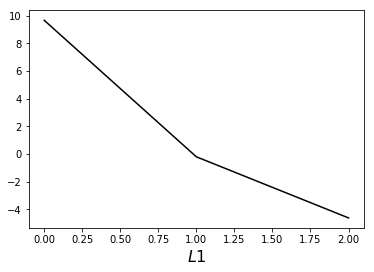

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果

plt.plot(syn0_history[0], ms=3, lw=1.5, color='black')
plt.xlabel(r'$L1$', fontsize=16)
plt.show()